# Cash Flow Forecasting Model

## Data Preparation

In [20]:
# Import Packages
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [21]:
transactions = pd.read_csv('./Data/InitTraining.csv')

In [22]:
transactions.replace({'Category' : {'Personal' : 'Personal Care'}}, inplace = True)
transactions.replace(',', '',regex=True, inplace=True)
transactions = transactions.astype({'Amount': float, 'Balance': float})
transactions = transactions.drop(columns=['Balance', 'Account'])
transactions['Date'] = pd.to_datetime(transactions['Date'])
transactions.set_index('Date', inplace=True)

In [23]:
food = transactions[transactions['Category'] == 'Food & Drinks']
housing = transactions[transactions['Category'] == 'Housing']
utilities = transactions[transactions['Category'] == 'Utilities']
personal = transactions[transactions['Category'] == 'Personal Care']
entertainment = transactions[transactions['Category'] == 'Entertainment']
income = transactions[transactions['Category'] == 'Income']
transportation = transactions[transactions['Category'] == 'Transportation']
debt = transactions[transactions['Category'] == 'Debt']
lifestyle = transactions[transactions['Category'] == 'Lifestyle']
bank = transactions[transactions['Category'] == 'Bank']
investment = transactions[transactions['Category'] == 'Investment']
savings = transactions[transactions['Category'] == 'Savings']

In [24]:
categories = [food, housing, utilities, 
              personal, entertainment, income, 
              transportation, debt, lifestyle, 
              bank, investment, savings]

## Prepare Dataframes for Time Series Analysis

In [39]:
def prepare(df):
    cols = ['Category', 'Sub-category']
    df.drop(cols, axis=1, inplace=True)
    df.sort_values('Date', inplace=True)
    df = df.astype({'Amount': float})
    df = df.groupby('Date')['Amount'].sum().reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

In [26]:
prepped_categories = []
for category in categories:
    prepped_categories.append(prepare(category))

## Visualize the Time Series Data

<Axes: ylabel='Density'>

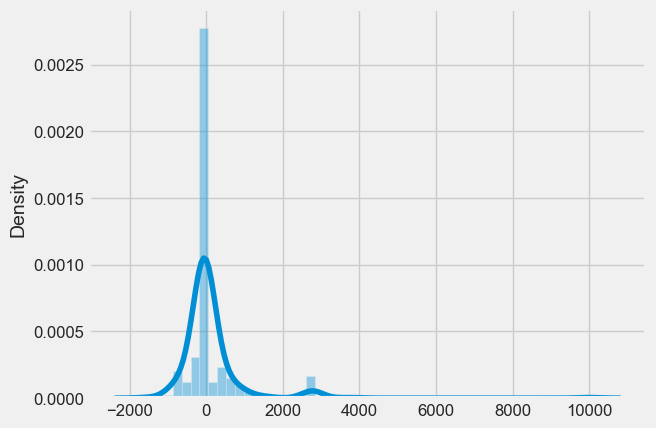

In [35]:
sns.distplot(transactions, x=transactions['Amount'], kde=True, rug=False)